In [1]:
### plot SD tracks - Hurricane missions
import numpy as np
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt
import datetime
import os
import sys
from scipy.stats import pearsonr
path_nhchi = os.path.expanduser('~/Documents/projects/analytical-tools/py_nhchi/')
# adding to the system path
sys.path.insert(0, path_nhchi)
from values_to_colors import truncate_colormap

In [2]:
### SD position data info
year = np.array(['2021','2022','2023','2024'])
path_data = '/Users/chi/Documents/projects/sd-adcp-manipulate/merge_raw_files/data_Hurricane_SD_pos/'
filenames_all = np.sort( os.listdir(path_data) )
### retain the filenames wanted only
filenames = np.array([])
for file in filenames_all:
    if ('pos' in file) & ('.nc' in file):
        filenames = np.append(filenames, file)
print(len(filenames),'Files have "pos" & ".nc" in the',path_data)
print(filenames)

### load topography data
path_topo = '/Users/chi/Documents/Data/Topography/GEBCO_24_Jul_2024/'
ds_topo = nc.Dataset(path_topo+'gebco_2024_n35.0_s5.0_w-92.0_e-50.0.nc')
# print(ds_topo)
lon_topo = ds_topo.variables['lon'][:]
lat_topo = ds_topo.variables['lat'][:]
elevation = ds_topo.variables['elevation'][:]
print(lon_topo.shape, lat_topo.shape, elevation.shape )

35 Files have "pos" & ".nc" in the /Users/chi/Documents/projects/sd-adcp-manipulate/merge_raw_files/data_Hurricane_SD_pos/
['pos-raw-merge-2021-SD1031.nc' 'pos-raw-merge-2021-SD1040.nc'
 'pos-raw-merge-2021-SD1045.nc' 'pos-raw-merge-2021-SD1048.nc'
 'pos-raw-merge-2021-SD1060.nc' 'pos-raw-merge-2022-SD1031.nc'
 'pos-raw-merge-2022-SD1032.nc' 'pos-raw-merge-2022-SD1040.nc'
 'pos-raw-merge-2022-SD1059.nc' 'pos-raw-merge-2022-SD1083.nc'
 'pos-raw-merge-2022-SD1084.nc' 'pos-raw-merge-2023-SD1031.nc'
 'pos-raw-merge-2023-SD1036.nc' 'pos-raw-merge-2023-SD1040.nc'
 'pos-raw-merge-2023-SD1041.nc' 'pos-raw-merge-2023-SD1042.nc'
 'pos-raw-merge-2023-SD1045.nc' 'pos-raw-merge-2023-SD1057.nc'
 'pos-raw-merge-2023-SD1064.nc' 'pos-raw-merge-2023-SD1065.nc'
 'pos-raw-merge-2023-SD1068.nc' 'pos-raw-merge-2023-SD1069.nc'
 'pos-raw-merge-2023-SD1083.nc' 'pos-raw-merge-2024-SD1030.nc'
 'pos-raw-merge-2024-SD1031.nc' 'pos-raw-merge-2024-SD1036.nc'
 'pos-raw-merge-2024-SD1040.nc' 'pos-raw-merge-2024-SD1041

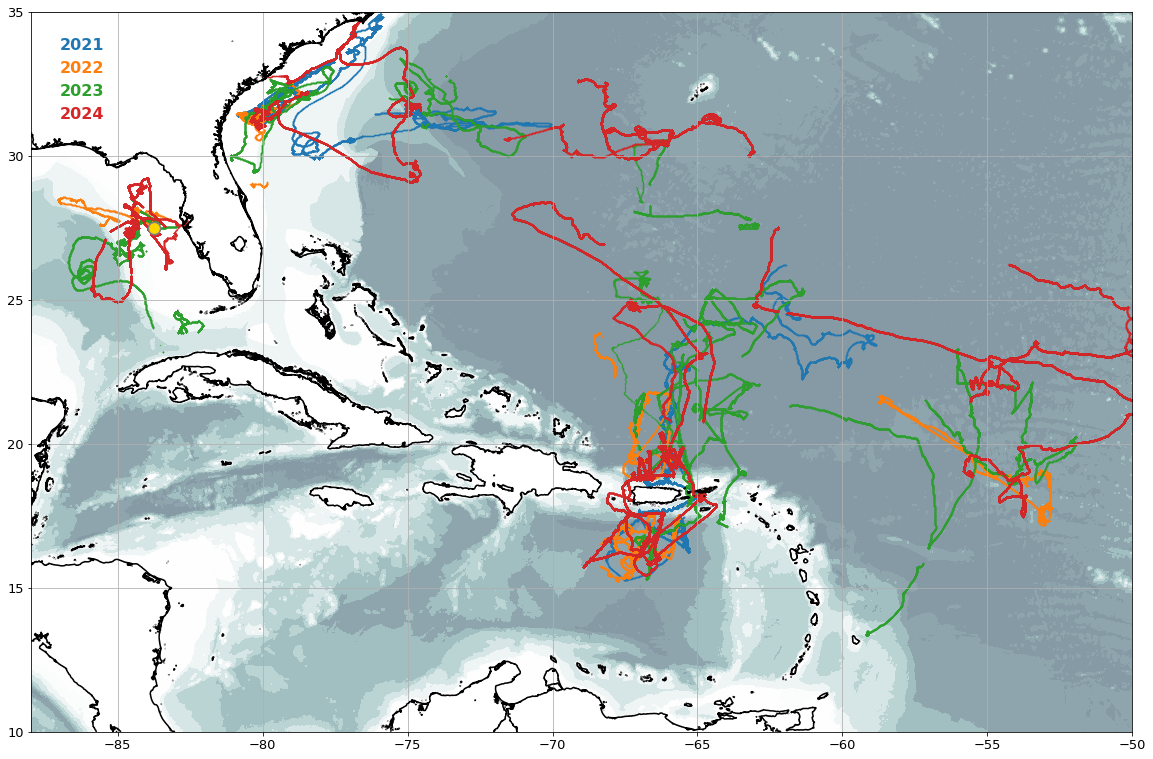

In [9]:
### plot tracks on map
ilon = np.where( lon_topo>= -90 )[0]
ilat = np.where( lat_topo>= 10 )[0]
cmap = truncate_colormap(plt.get_cmap('bone'),0.6,1)
# cols = ['pink','yellow','lime','cyan']
cols = ['tab:blue','tab:orange','tab:green','tab:red']

### plot topography
fig = plt.figure(figsize=(18,12.5))
plt.rcParams.update({'font.size': 13})
ax2 = fig.add_axes([0.05,0,0.85,0.8])
levels_ocean = np.concatenate((np.arange(-5000,0,1000), np.arange(-200,100,100)))
cs = ax2.contourf(lon_topo[ilon], lat_topo[ilat], elevation[np.ix_(ilat,ilon)], cmap=cmap,levels=levels_ocean,extend='both')
ax2.contour(lon_topo[ilon], lat_topo[ilat], elevation[np.ix_(ilat,ilon)], colors='k',levels=0)
### add terrain colorbar
# cbar_ax = fig.add_axes([.91,.05,.005,.3])
# axf = plt.colorbar(cs,orientation='vertical',cax=cbar_ax,extend='both')
### plot tracks - color by year
vars_str = ['longitude','latitude']
year_append = []
for i, file in enumerate( filenames ):
    ds = nc.Dataset(path_data + file)
    # print(file)
    ### read lon/ lat from this position file
    for v in range( len(vars_str) ):
        exec(vars_str[v]+'= ds.variables["'+vars_str[v]+'"][:]')
    ### plot
    year_this_file = file[14:18]
    icol = np.where( year == year_this_file )[0][0]
    if year_this_file not in year_append:
        year_append.append( year_this_file )
        ax2.text(-87,34.5-len(year_append)*0.8,year_this_file,fontsize=16,color=cols[icol],fontweight='bold') #
    ax2.scatter( longitude, latitude, s=0.1,c=cols[icol])
### add buoy C12 location
# ax2.text(-83.741,27.505,'o',color='c',fontsize=50,fontweight='heavy')
ax2.scatter(-83.741,27.505,s=150,c='gold',edgecolors='gray',lw=1.5)
### figure settings
ax2.set_xlim([-88,-50])
ax2.set_ylim([10,35])
ax2.grid()
### save figure
fig.savefig('map_SD-tracks_'+'-'.join(year)+'.png', dpi=600,bbox_inches='tight')

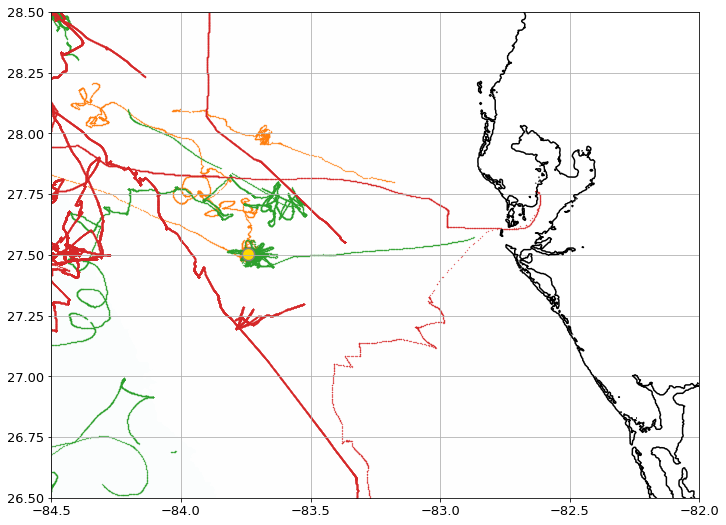

In [10]:
### plot tracks on map - zoom in to 
ilon = np.where( lon_topo>= -90 )[0]
ilat = np.where( lat_topo>= 10 )[0]
cmap = truncate_colormap(plt.get_cmap('bone'),0.6,1)
# cols = ['pink','yellow','lime','cyan']

### plot topography
fig = plt.figure(figsize=(15,15))
plt.rcParams.update({'font.size': 13})
ax2 = fig.add_axes([0.05,0,0.6,0.45])
levels_ocean = np.concatenate((np.arange(-5000,0,1000), np.arange(-200,100,100)))
cs = ax2.contourf(lon_topo[ilon], lat_topo[ilat], elevation[np.ix_(ilat,ilon)], cmap=cmap,levels=levels_ocean,extend='both')
ax2.contour(lon_topo[ilon], lat_topo[ilat], elevation[np.ix_(ilat,ilon)], colors='k',levels=0)
### add terrain colorbar
# cbar_ax = fig.add_axes([.91,.05,.005,.3])
# axf = plt.colorbar(cs,orientation='vertical',cax=cbar_ax,extend='both')
### plot tracks - color by year
vars_str = ['longitude','latitude']
year_append = []
for i, file in enumerate( filenames ):
    ds = nc.Dataset(path_data + file)
    # print(file)
    ### read lon/ lat from this position file
    for v in range( len(vars_str) ):
        exec(vars_str[v]+'= ds.variables["'+vars_str[v]+'"][:]')
    ### plot
    year_this_file = file[14:18]
    icol = np.where( year == year_this_file )[0][0]
    # if year_this_file not in year_append:
    #     year_append.append( year_this_file )
    #     ax2.text(-87,34.5-len(year_append)*0.8,year_this_file,fontsize=16,color=cols[icol],fontweight='bold') #
    ax2.scatter( longitude, latitude, s=0.1,c=cols[icol])
### add buoy C12 location
# ax2.text(-83.741,27.505,'o',color='m',fontsize=50,fontweight='heavy')
ax2.scatter(-83.741,27.505,s=150,c='gold',edgecolors='gray',lw=1.5)
### figure settings
ax2.set_xlim([-84.5,-82])
ax2.set_ylim([26.5,28.5])
ax2.grid()
### save figure
fig.savefig('map_zoom-in-to-2023-SD1042_SD-tracks_'+'-'.join(year)+'.png', dpi=600,bbox_inches='tight')
